
# **<p style="font-family:newtimeroman;font-size:200%;text-align:center;color: rgb(50, 216, 86)3);">Roman Urdu to English Translation Dataset Analysis </p>**

# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #a2f8a9;">About Dataset </p>**

### 🌐 Roman Urdu Sentences (Urdu & English Translations)
This is a multilingual parallel dataset containing Roman Urdu sentences, Urdu script sentences, and English translations across 20 categories including Health, Food, Travel, Banking, Fitness, Education, and more.

The dataset is ideal for NLP tasks such as translation, Roman Urdu → Urdu script conversion, text classification, and language modeling.
### A Startup Notebook

Welcome to this comprehensive exploratory data analysis (EDA) notebook on a Roman Urdu parallel dataset!  
Here, we will explore sentence structures, word distributions, category insights, and visualize patterns in a beautiful and interactive way.

### 📌 Notebook Highlights
- **Dataset Preview:** Understand the structure and sample entries.
- **Dataset Info & Missing Values:** Quick check for nulls and types.
- **Category Analysis:** Number of sentences per category and distribution plots.
- **Sentence Length Analysis:** Compare sentence lengths in Roman Urdu, Urdu script, and English translations.
- **Top Words & Word Clouds:** Identify frequently used words and generate visually appealing word clouds.
- **Random Examples:** Explore some random sentences from the dataset.
- **Interactive Insights:** Visualizations with colors, emojis, and charts to make EDA engaging.

### 🎯 Purpose of this Notebook
This notebook is designed to:
1. Analyze and visualize the Roman Urdu parallel dataset.
2. Provide insights for NLP tasks, machine translation, and text preprocessing experiments.
3. Serve as a beautiful, educational, and shareable Kaggle notebook for anyone interested in Roman Urdu or multilingual datasets.

🚀 **Let's Dive In!**  
Prepare for a colorful, emoji-rich, and fully visual exploration of the dataset!


##  **<p style="font-family:newtimeroman;font-size:196%;text-align:center;color: #82f37f;">🔧 Technical Implementation </p>**

In [1]:
# ==============================================================
# 📦 Import Required Libraries
# ==============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from IPython.display import display, HTML, Markdown
import warnings
warnings.filterwarnings('ignore')

# ==============================================================
# 🎨 Visualization Configuration
# ==============================================================

# Set professional plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Configure figure parameters
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.labelweight'] = 'semibold'
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['figure.titlesize'] = 20
plt.rcParams['figure.titleweight'] = 'bold'

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)


# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">📂 Data Loading & Initial Exploration </p>**

In [2]:
# ==============================================================
# 📥 Load the Dataset
# ==============================================================

# Load the CSV file
df = pd.read_csv("Roman_Urdu_Parallel_Translation.csv")

# Display dataset shape
print(f"📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]:,} columns\n")

📊 Dataset Shape: 4,000 rows × 5 columns



In [3]:
# ==============================================================
# 🔍 Dataset Overview
# ==============================================================

# Create a styled HTML table for dataset overview
html_table = """
<table style="width:100%; border-collapse: collapse; background-color: #f8f9fa; border: 2px solid #4CAF50; border-radius: 10px;">
    <tr style="background-color: #4CAF50; color: white;">
        <th style="padding: 12px; text-align: left; border-radius: 8px 0 0 0;">Dataset Attribute</th>
        <th style="padding: 12px; text-align: left; border-radius: 0 8px 0 0;">Value</th>
    </tr>
    <tr style="border-bottom: 1px solid #ddd;">
        <td style="padding: 10px; font-weight: bold;">Total Records</td>
        <td style="padding: 10px;">{0:,}</td>
    </tr>
    <tr style="background-color: #e9ecef; border-bottom: 1px solid #ddd;">
        <td style="padding: 10px; font-weight: bold;">Total Features</td>
        <td style="padding: 10px;">{1}</td>
    </tr>
    <tr style="border-bottom: 1px solid #ddd;">
        <td style="padding: 10px; font-weight: bold;">Memory Usage</td>
        <td style="padding: 10px;">{2:.2f} MB</td>
    </tr>
    <tr style="background-color: #e9ecef;">
        <td style="padding: 10px; font-weight: bold;">Categories</td>
        <td style="padding: 10px;">{3}</td>
    </tr>
</table>
""".format(
    len(df), 
    len(df.columns), 
    df.memory_usage(deep=True).sum() / (1024**2),
    df['category'].nunique()
)

display(HTML(html_table))

Dataset Attribute,Value
Total Records,"4,000"
Total Features,5
Memory Usage,2.22 MB
Categories,20




# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">📊Data Quality Assessment </p>**

In [4]:
# ==============================================================
# 🧹 Missing Values Analysis
# ==============================================================

# Calculate missing values
missing_df = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': df.isnull().sum().values,
    'Missing %': (df.isnull().sum().values / len(df) * 100).round(2)
})

# Style the dataframe
styled_missing = missing_df.style.background_gradient(cmap='RdYlGn_r', subset=['Missing %'])\
    .format({'Missing %': '{:.2f}%'})\
    .set_properties(**{'text-align': 'left'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#4CAF50'), ('color', 'white'), ('padding', '10px')]
    }])

display(HTML("<h3>🔍 Missing Values Summary</h3>"))
display(styled_missing)

,Column,Missing Values,Missing %
0,category,0,0.00%
1,roman_urdu,0,0.00%
2,urdu_script,0,0.00%
3,translated_by_llm,0,0.00%
4,translated_by_google,0,0.00%


In [5]:
# ==============================================================
# 📋 Data Types Information
# ==============================================================

# Create a DataFrame for data types
dtype_info = pd.DataFrame(df.dtypes.reset_index())
dtype_info.columns = ['Column', 'Data Type']
dtype_info['Unique Values'] = [df[col].nunique() for col in dtype_info['Column']]

# Display styled dataframe
styled_dtype = dtype_info.style.set_properties(**{'text-align': 'left'})\
    .set_table_styles([{
        'selector': 'th',
        'props': [('background-color', '#2196F3'), ('color', 'white'), ('padding', '10px')]
    }])

display(HTML("<h3>📊 Column Data Types</h3>"))
display(styled_dtype)

,Column,Data Type,Unique Values
0,category,object,20
1,roman_urdu,object,3992
2,urdu_script,object,3968
3,translated_by_llm,object,3956
4,translated_by_google,object,3956



# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">📈 Category Distribution Analysis</p>**

,Category,Count,Percentage
0,Health,200,5.0
1,Food,200,5.0
2,Travel,200,5.0
3,Banking,200,5.0
4,Education,200,5.0
5,Cricket,200,5.0
6,Weather,200,5.0
7,Shopping,200,5.0
8,General,200,5.0
9,Technology,200,5.0


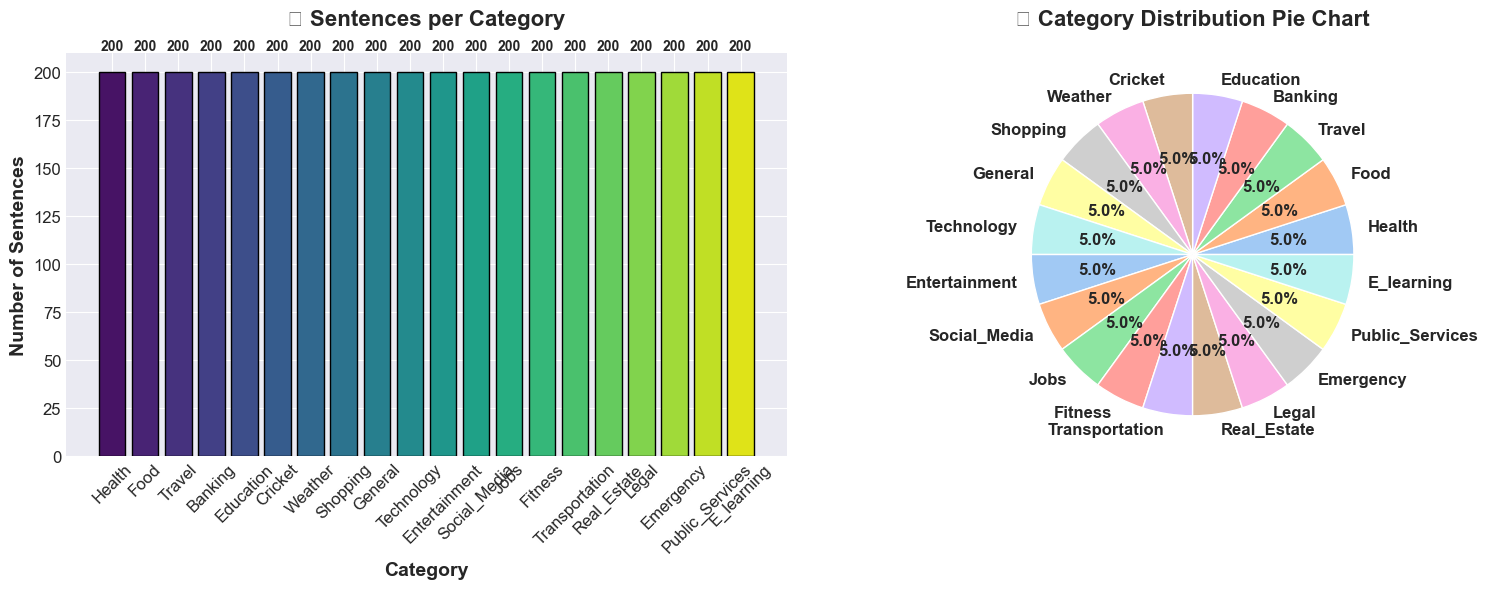

In [6]:
# ==============================================================
# 📊 Category Frequency Analysis
# ==============================================================

# Calculate category counts
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']
category_counts['Percentage'] = (category_counts['Count'] / len(df) * 100).round(2)

# Display category statistics
display(HTML("<h3>📋 Category Distribution Statistics</h3>"))
display(category_counts)

# ==============================================================
# 🎨 Category Distribution Visualization
# ==============================================================

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Bar plot
colors = sns.color_palette("viridis", len(category_counts))
bars = ax1.bar(category_counts['Category'], category_counts['Count'], color=colors, edgecolor='black', linewidth=1)
ax1.set_title('📊 Sentences per Category', fontsize=16, fontweight='bold', pad=20)
ax1.set_xlabel('Category', fontsize=14)
ax1.set_ylabel('Number of Sentences', fontsize=14)
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, count in zip(bars, category_counts['Count']):
    ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{count}', ha='center', va='bottom', fontweight='bold')

# Pie chart
colors_pie = sns.color_palette('pastel', len(category_counts))
wedges, texts, autotexts = ax2.pie(category_counts['Count'], 
                                     labels=category_counts['Category'],
                                     autopct='%1.1f%%',
                                     colors=colors_pie,
                                     textprops={'fontsize': 12, 'fontweight': 'semibold'},
                                     wedgeprops={'edgecolor': 'white', 'linewidth': 1})

ax2.set_title('🥧 Category Distribution Pie Chart', fontsize=16, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()


# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">📏 Sentence Length Analysis</p>**

In [7]:
# ==============================================================
# 📏 Calculate Sentence Lengths
# ==============================================================

# Add length columns for analysis
df['roman_len'] = df['roman_urdu'].astype(str).apply(lambda x: len(x.split()))
df['urdu_len'] = df['urdu_script'].astype(str).apply(lambda x: len(x.split()))
df['english_len'] = df['translated_by_llm'].astype(str).apply(lambda x: len(x.split()))

# Calculate summary statistics
length_stats = pd.DataFrame({
    'Language': ['Roman Urdu', 'Urdu Script', 'English Translation'],
    'Mean Length': [df['roman_len'].mean(), df['urdu_len'].mean(), df['english_len'].mean()],
    'Median Length': [df['roman_len'].median(), df['urdu_len'].median(), df['english_len'].median()],
    'Std Dev': [df['roman_len'].std(), df['urdu_len'].std(), df['english_len'].std()],
    'Min Length': [df['roman_len'].min(), df['urdu_len'].min(), df['english_len'].min()],
    'Max Length': [df['roman_len'].max(), df['urdu_len'].max(), df['english_len'].max()]
})

# Round numeric columns
for col in ['Mean Length', 'Median Length', 'Std Dev']:
    length_stats[col] = length_stats[col].round(2)

display(HTML("<h3>📊 Sentence Length Statistics</h3>"))
display(length_stats)

,Language,Mean Length,Median Length,Std Dev,Min Length,Max Length
0,Roman Urdu,10.43,10.0,3.28,3,18
1,Urdu Script,11.83,11.0,4.48,3,24
2,English Translation,9.41,9.0,2.51,3,16


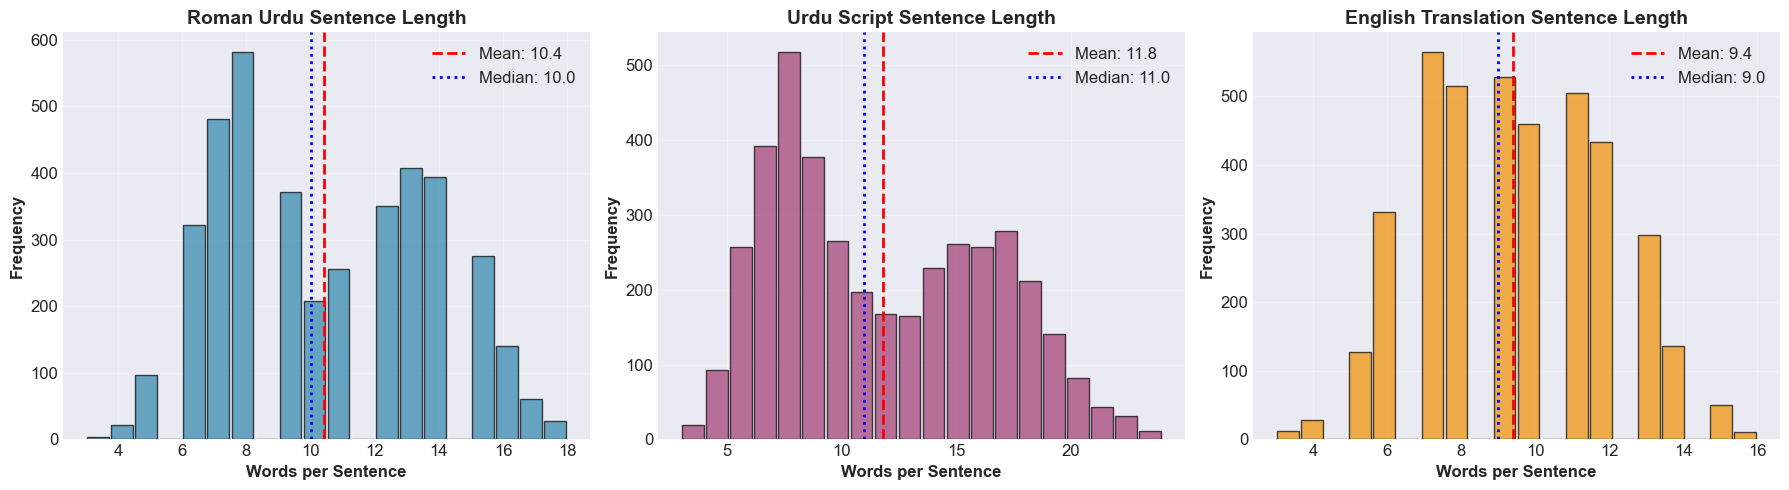

In [8]:
# ==============================================================
# 📊 Sentence Length Distribution Histograms
# ==============================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Define colors and titles
languages = [
    ('roman_len', '#2E86AB', 'Roman Urdu'),
    ('urdu_len', '#A23B72', 'Urdu Script'),
    ('english_len', '#F18F01', 'English Translation')
]

for i, (col, color, title) in enumerate(languages):
    ax = axes[i]
    n, bins, patches = ax.hist(df[col], bins=20, color=color, edgecolor='black', alpha=0.7, rwidth=0.9)
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='blue', linestyle=':', linewidth=2, label=f'Median: {median_val:.1f}')
    
    ax.set_title(f'{title} Sentence Length', fontsize=14, fontweight='bold')
    ax.set_xlabel('Words per Sentence', fontsize=12)
    ax.set_ylabel('Frequency', fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

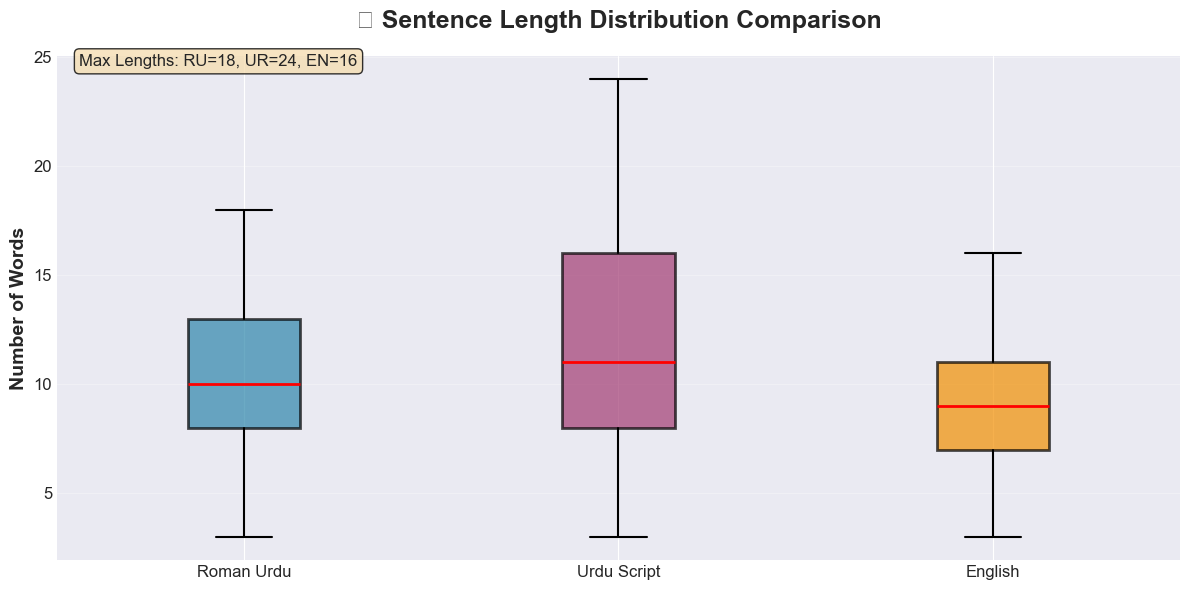

In [9]:
# ==============================================================
# 📦 Sentence Length Boxplot Comparison
# ==============================================================

plt.figure(figsize=(12, 6))

# Prepare data for boxplot
box_data = [df['roman_len'], df['urdu_len'], df['english_len']]
box_labels = ['Roman Urdu', 'Urdu Script', 'English']

# Create boxplot
bp = plt.boxplot(box_data, labels=box_labels, patch_artist=True, 
                 boxprops=dict(linewidth=2),
                 medianprops=dict(color='red', linewidth=2),
                 whiskerprops=dict(linewidth=1.5),
                 capprops=dict(linewidth=1.5),
                 flierprops=dict(marker='o', markerfacecolor='gray', markersize=5, alpha=0.5))

# Color the boxes
colors = ['#2E86AB', '#A23B72', '#F18F01']
for box, color in zip(bp['boxes'], colors):
    box.set_facecolor(color)
    box.set_alpha(0.7)

plt.title('📦 Sentence Length Distribution Comparison', fontsize=18, fontweight='bold', pad=20)
plt.ylabel('Number of Words', fontsize=14)
plt.grid(True, alpha=0.3, axis='y')

# Add statistical annotations
stats_text = f"Max Lengths: RU={df['roman_len'].max()}, UR={df['urdu_len'].max()}, EN={df['english_len'].max()}"
plt.annotate(stats_text, xy=(0.02, 0.98), xycoords='axes fraction', 
             fontsize=12, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()



# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">🔤  Vocabulary Analysis </p>**

In [10]:
# ==============================================================
# 🔤 Most Frequent Words Analysis
# ==============================================================

def get_top_words(text_series, n=20, language='Roman Urdu'):
    """
    Extract and return top N most frequent words from a text series.
    """
    all_words = ' '.join(text_series.astype(str)).lower().split()
    word_counts = Counter(all_words)
    top_words = word_counts.most_common(n)
    
    # Create DataFrame
    df_words = pd.DataFrame(top_words, columns=['Word', 'Frequency'])
    df_words['Rank'] = range(1, len(df_words) + 1)
    df_words['Frequency %'] = (df_words['Frequency'] / len(all_words) * 100).round(3)
    
    return df_words, all_words

# Get top words for each language
roman_words_df, roman_all_words = get_top_words(df['roman_urdu'], language='Roman Urdu')
urdu_words_df, urdu_all_words = get_top_words(df['urdu_script'], language='Urdu Script')
english_words_df, english_all_words = get_top_words(df['translated_by_llm'], language='English')

# Display top words tables
display(HTML("<h3>📝 Top 20 Most Frequent Words - Roman Urdu</h3>"))
display(roman_words_df)

display(HTML("<h3>📝 Top 20 Most Frequent Words - English Translation</h3>"))
display(english_words_df)

,Word,Frequency,Rank,Frequency %
0,aur,3213,1,7.702
1,hai,1693,2,4.058
2,hain,1596,3,3.826
3,ke,1261,4,3.023
4,liye,1047,5,2.510
5,mujhe,882,6,2.114
6,karna,764,7,1.831
7,ka,741,8,1.776
8,karte,688,9,1.649
9,rozana,672,10,1.611


,Word,Frequency,Rank,Frequency %
0,and,3170,1,8.420
1,the,1157,2,3.073
2,for,1082,3,2.874
3,i,1076,4,2.858
4,daily,702,5,1.865
5,is,684,6,1.817
6,to,680,7,1.806
7,my,671,8,1.782
8,need,609,9,1.618
9,are,551,10,1.463


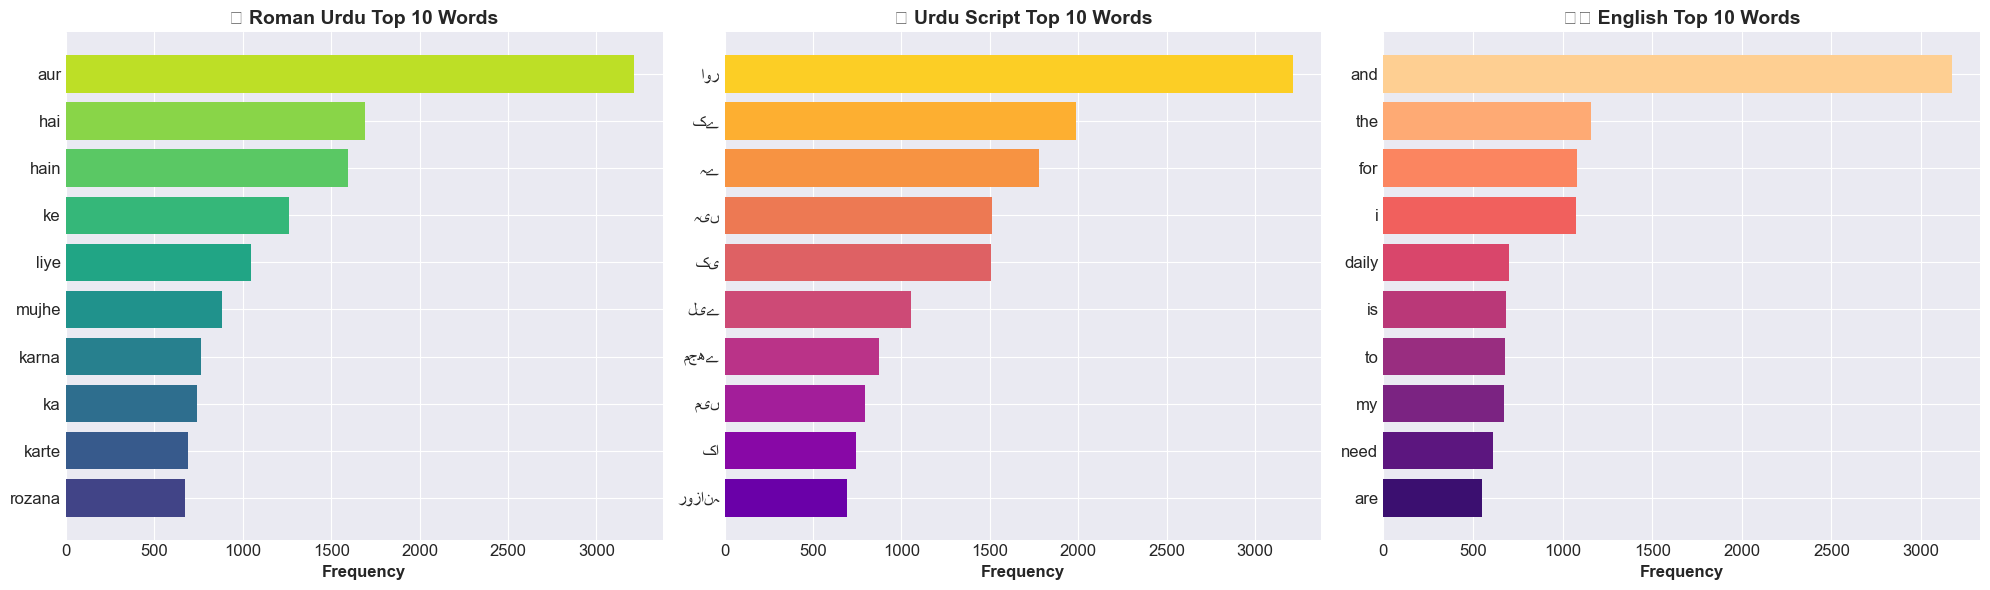

In [ ]:
# ==============================================================
# 📊 Top Words Bar Chart Comparison
# ==============================================================
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Plot for Roman Urdu
ax1 = axes[0]
colors_ru = plt.cm.viridis(np.linspace(0.2, 0.9, 10))
ax1.barh(roman_words_df['Word'][:10][::-1],
         roman_words_df['Frequency'][:10][::-1],
         color=colors_ru)
ax1.set_title('🔤 Roman Urdu Top 10 Words', fontsize=14, fontweight='bold')
ax1.set_xlabel('Frequency', fontsize=12)

# Plot for Urdu Script
ax2 = axes[1]
colors_us = plt.cm.plasma(np.linspace(0.2, 0.9, 10))
ax2.barh(urdu_words_df['Word'][:10][::-1],
         urdu_words_df['Frequency'][:10][::-1],
         color=colors_us)
ax2.set_title('🖋 Urdu Script Top 10 Words', fontsize=14, fontweight='bold')
ax2.set_xlabel('Frequency', fontsize=12)

# Plot for English
ax3 = axes[2]
colors_en = plt.cm.magma(np.linspace(0.2, 0.9, 10))
ax3.barh(english_words_df['Word'][:10][::-1],
         english_words_df['Frequency'][:10][::-1],
         color=colors_en)
ax3.set_title('✍️ English Top 10 Words', fontsize=14, fontweight='bold')
ax3.set_xlabel('Frequency', fontsize=12)

plt.tight_layout()
plt.show()



# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">☁️  Word Cloud Visualizations </p>**

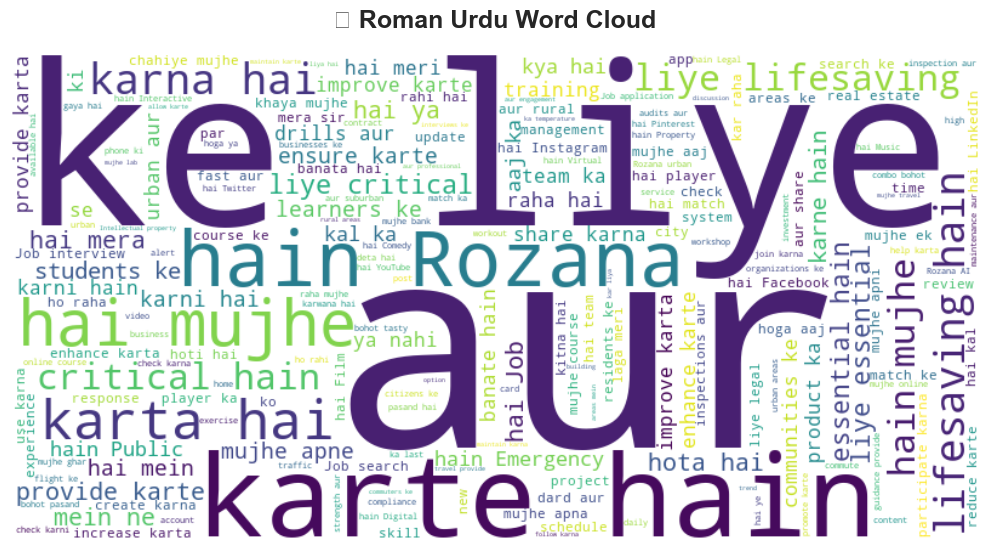

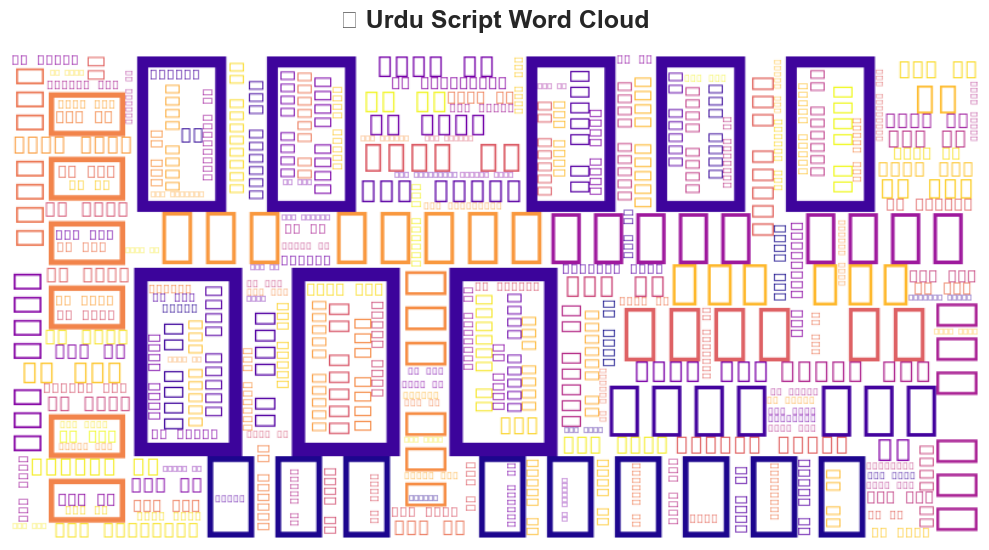

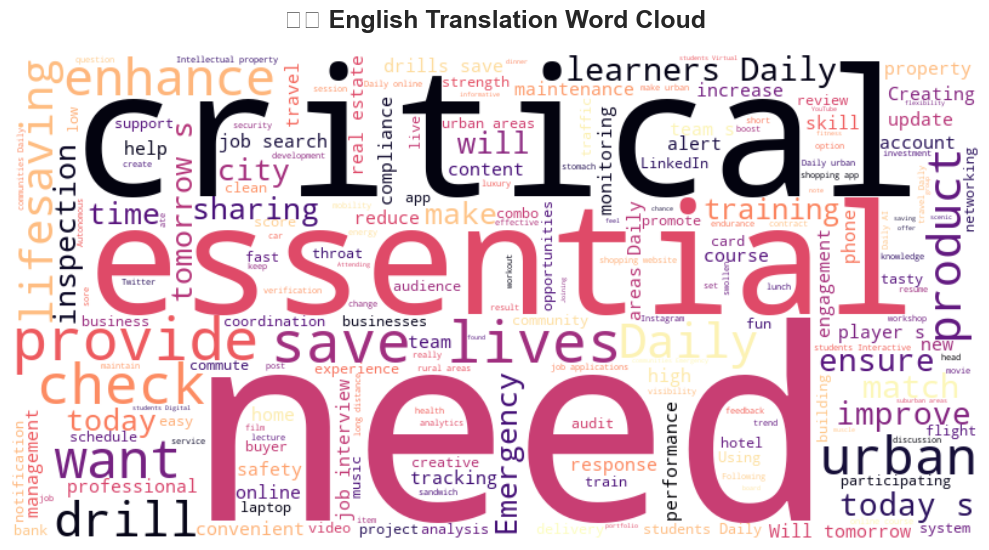

In [13]:
# ==============================================================
# ☁️ Word Cloud Generation Function
# ==============================================================

def create_wordcloud(text_data, title, colormap='viridis', figsize=(10, 6)):
    """
    Generate and display a word cloud with custom styling.
    """
    # Join all text
    full_text = ' '.join(text_data.astype(str))
    
    # Create word cloud
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap=colormap,
        max_words=200,
        contour_width=1,
        contour_color='steelblue',
        random_state=42
    ).generate(full_text)
    
    # Plot
    plt.figure(figsize=figsize)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=18, fontweight='bold', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Generate word clouds for each language
create_wordcloud(df['roman_urdu'], '📝 Roman Urdu Word Cloud', colormap='viridis')
create_wordcloud(df['urdu_script'], '🖋 Urdu Script Word Cloud', colormap='plasma')
create_wordcloud(df['translated_by_llm'], '✍️ English Translation Word Cloud', colormap='magma')



# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">🔍 Translation Comparison Analysis </p>**

In [14]:
# ==============================================================
# 🔍 LLM vs Google Translation Comparison
# ==============================================================

# Calculate length differences
df['llm_len'] = df['translated_by_llm'].astype(str).apply(lambda x: len(x.split()))
df['google_len'] = df['translated_by_google'].astype(str).apply(lambda x: len(x.split()))
df['length_diff'] = abs(df['llm_len'] - df['google_len'])

# Analyze translations
translation_stats = pd.DataFrame({
    'Metric': ['Mean LLM Length', 'Mean Google Length', 'Mean Absolute Difference', 
               'Max Difference', 'Identical Translations', 'Different Translations'],
    'Value': [
        f"{df['llm_len'].mean():.2f} words",
        f"{df['google_len'].mean():.2f} words",
        f"{df['length_diff'].mean():.2f} words",
        f"{df['length_diff'].max()} words",
        f"{(df['translated_by_llm'] == df['translated_by_google']).sum():,} ({((df['translated_by_llm'] == df['translated_by_google']).sum() / len(df) * 100):.1f}%)",
        f"{(df['translated_by_llm'] != df['translated_by_google']).sum():,} ({((df['translated_by_llm'] != df['translated_by_google']).sum() / len(df) * 100):.1f}%)"
    ]
})

display(HTML("<h3>🔄 Translation Comparison Statistics</h3>"))
display(translation_stats)

,Metric,Value
0,Mean LLM Length,9.41 words
1,Mean Google Length,9.68 words
2,Mean Absolute Difference,0.65 words
3,Max Difference,7 words
4,Identical Translations,576 (14.4%)
5,Different Translations,"3,424 (85.6%)"


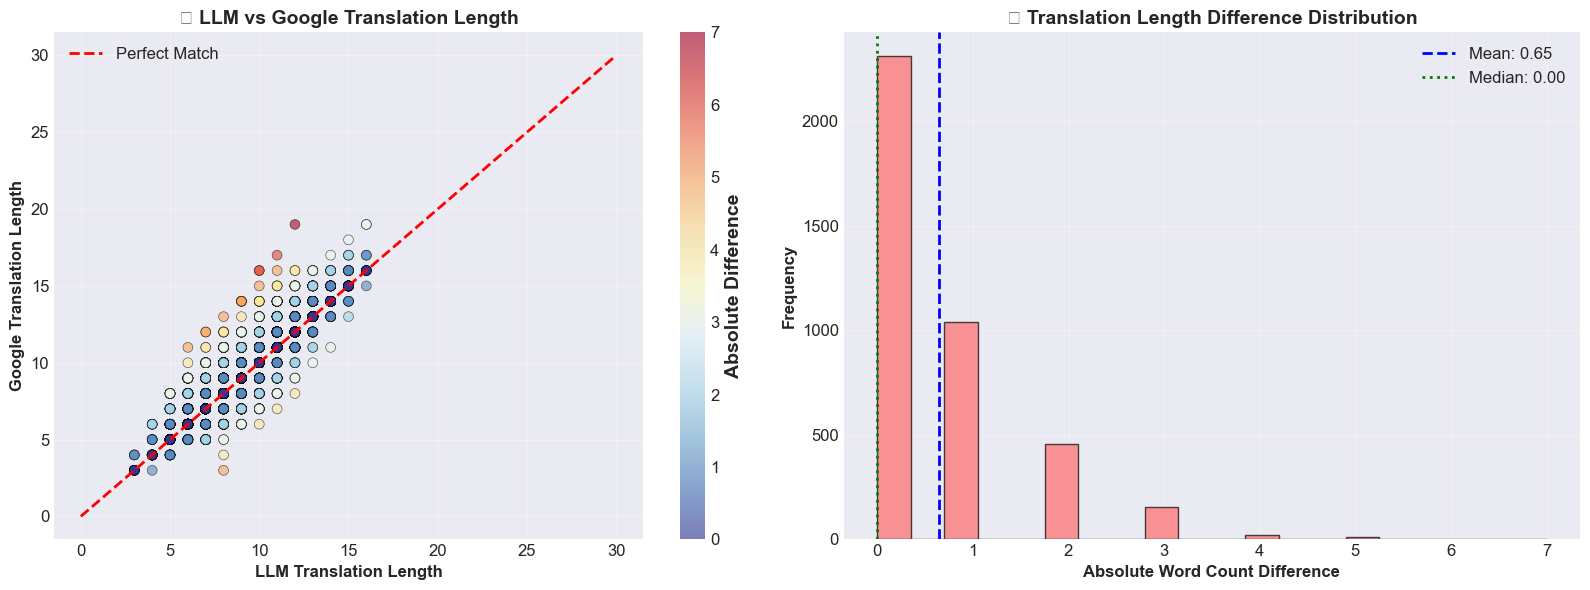

In [15]:
# ==============================================================
# 📊 Translation Length Comparison
# ==============================================================

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatter plot
ax1 = axes[0]
scatter = ax1.scatter(df['llm_len'], df['google_len'], 
                       c=df['length_diff'], cmap='RdYlBu_r', 
                       alpha=0.6, edgecolors='black', linewidth=0.5, s=50)
ax1.plot([0, 30], [0, 30], 'r--', linewidth=2, label='Perfect Match')
ax1.set_xlabel('LLM Translation Length', fontsize=12)
ax1.set_ylabel('Google Translation Length', fontsize=12)
ax1.set_title('🔄 LLM vs Google Translation Length', fontsize=14, fontweight='bold')
ax1.grid(True, alpha=0.3)
ax1.legend()
plt.colorbar(scatter, ax=ax1, label='Absolute Difference')

# Histogram of differences
ax2 = axes[1]
ax2.hist(df['length_diff'], bins=20, color='#FF6B6B', edgecolor='black', alpha=0.7)
ax2.axvline(df['length_diff'].mean(), color='blue', linestyle='--', 
            linewidth=2, label=f"Mean: {df['length_diff'].mean():.2f}")
ax2.axvline(df['length_diff'].median(), color='green', linestyle=':', 
            linewidth=2, label=f"Median: {df['length_diff'].median():.2f}")
ax2.set_xlabel('Absolute Word Count Difference', fontsize=12)
ax2.set_ylabel('Frequency', fontsize=12)
ax2.set_title('📊 Translation Length Difference Distribution', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">🎲 Random Sample Exploration </p>**

In [16]:
# ==============================================================
# 🎲 Random Sample of 10 Records
# ==============================================================

# Select random samples
random_samples = df.sample(10, random_state=42)[['category', 'roman_urdu', 'urdu_script', 
                                                   'translated_by_llm', 'translated_by_google']]

# Style the dataframe
styled_samples = random_samples.style.set_properties(**{
    'text-align': 'left',
    'white-space': 'pre-wrap',
    'border': '1px solid #ddd'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#4CAF50'), ('color', 'white'), ('padding', '12px')]
}, {
    'selector': 'td',
    'props': [('padding', '10px')]
}]).set_properties(subset=['roman_urdu', 'urdu_script', 'translated_by_llm', 'translated_by_google'],
                   **{'font-family': 'monospace'})

display(HTML("<h3>🎲 Random Sample Records</h3>"))
display(styled_samples)

,category,roman_urdu,urdu_script,translated_by_llm,translated_by_google
555,Travel,meri hotel room city center ke nazdeek hai,میرا ہوٹل روم سٹی سینٹر کے نزدیک ہے,My hotel room is near the city center,My hotel room is near the city center
3491,Emergency,Emergency flash flood drills aur evacuation planning riverine areas mein preparedness enhance karte hain,ایمرجنسی فلیش فلڈ ڈرلز اور ایواکیوایشن پلاننگ دریائی علاقوں میں تیاری کو بڑھاتی ہیں,Emergency flash flood drills and evacuation planning enhance preparedness in riverine areas,Emergency flash flood drills and evacuation planning enhance preparedness in riparian areas
527,Travel,mujhe train journey ke liye seat preference choose karni hai,مجھے ٹرین جانی کے لیے سیٹ پریفرنس چننی ہے,I need to choose seat preference for the train journey,I have to select seat preference for Train Johnny
3925,E_learning,Rozana video lecture subtitle accuracy aur synchronization check students ke liye critical hain,روزانہ ویڈیو لیکچر کے سب ٹائٹل کی درستگی اور ہم آہنگی کی جانچ طلباء کے لیے اہم ہیں,Daily video lecture subtitle accuracy and synchronization check are critical for students,Checking the accuracy and coherence of daily video lecture subtitles is important for students
2989,Transportation,Rozana AI-powered traffic lights aur smart intersections commute aur safety improve karte hain,روزانہ اے آئی پر مبنی ٹریفک لائٹس اور سمارٹ چوراہے سفر اور حفاظت کو بہتر کرتے ہیں,Daily AI-powered traffic lights and smart intersections improve commute and safety,Everyday AI-based traffic lights and smart intersections improve travel and safety
70,Health,mujhe nausea aur dizziness aur thakan hai,مجھے متلی اور چکر اور تھکن ہے,I feel nauseous dizzy and tired,I have nausea and dizziness and fatigue
1756,General,mujhe apne drawers ki lining change karni hai,مجھے درازوں کی لائننگ تبدیل کرنی ہے,I need to change the drawer lining,I need to change the lining of the drawers
211,Food,mujhe biryani ka masala bohot acha laga,مجھے بریانی کا مصالحہ بہت اچھا لگا,I really liked the biryani spices,I liked the spice of biryani very much
196,Health,mujhe nausea aur mild vomiting ho rahi hai,مجھے متلی اور ہلکی الٹی ہو رہی ہے,I feel nauseous and slightly vomiting,I am having nausea and mild vomiting
803,Education,mera semester result upload ho gaya hai,میرا سمسٹر رزلٹ اپ لوڈ ہو گیا ہے,My semester result has been uploaded,My semester result has been uploaded



# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">📈  Category-wise Length Analysis </p>**

In [17]:
# ==============================================================
# 📊 Category-wise Sentence Length Analysis
# ==============================================================

# Group by category and calculate statistics
category_stats = df.groupby('category').agg({
    'roman_len': ['mean', 'std', 'min', 'max'],
    'urdu_len': ['mean', 'std', 'min', 'max'],
    'english_len': ['mean', 'std', 'min', 'max']
}).round(2)

# Flatten column names
category_stats.columns = ['_'.join(col).strip() for col in category_stats.columns.values]
category_stats = category_stats.reset_index()

display(HTML("<h3>📊 Category-wise Sentence Length Statistics</h3>"))
display(category_stats)

,category,roman_len_mean,roman_len_std,roman_len_min,roman_len_max,urdu_len_mean,urdu_len_std,urdu_len_min,urdu_len_max,english_len_mean,english_len_std,english_len_min,english_len_max
0,Banking,7.46,1.57,4,13,7.95,1.80,4,12,7.65,1.62,4,13
1,Cricket,6.92,1.31,3,10,7.16,1.40,3,11,7.74,1.46,4,12
2,E_learning,12.44,0.91,11,15,17.12,2.03,12,22,11.44,0.91,10,14
3,Education,7.85,0.98,5,11,8.40,1.25,5,12,8.62,1.29,6,11
4,Emergency,14.36,1.31,10,18,16.67,2.22,11,22,12.73,1.36,8,16
5,Entertainment,10.36,1.51,7,16,11.00,1.88,7,17,8.82,1.67,4,13
6,Fitness,12.03,1.33,9,16,14.00,2.15,9,20,9.78,1.37,6,14
7,Food,8.01,1.49,4,11,8.68,1.92,4,14,7.58,1.44,4,12
8,General,7.52,0.98,5,10,7.58,1.09,5,12,7.30,1.02,5,10
9,Health,6.92,1.50,3,12,7.26,1.61,3,12,6.60,1.73,3,11


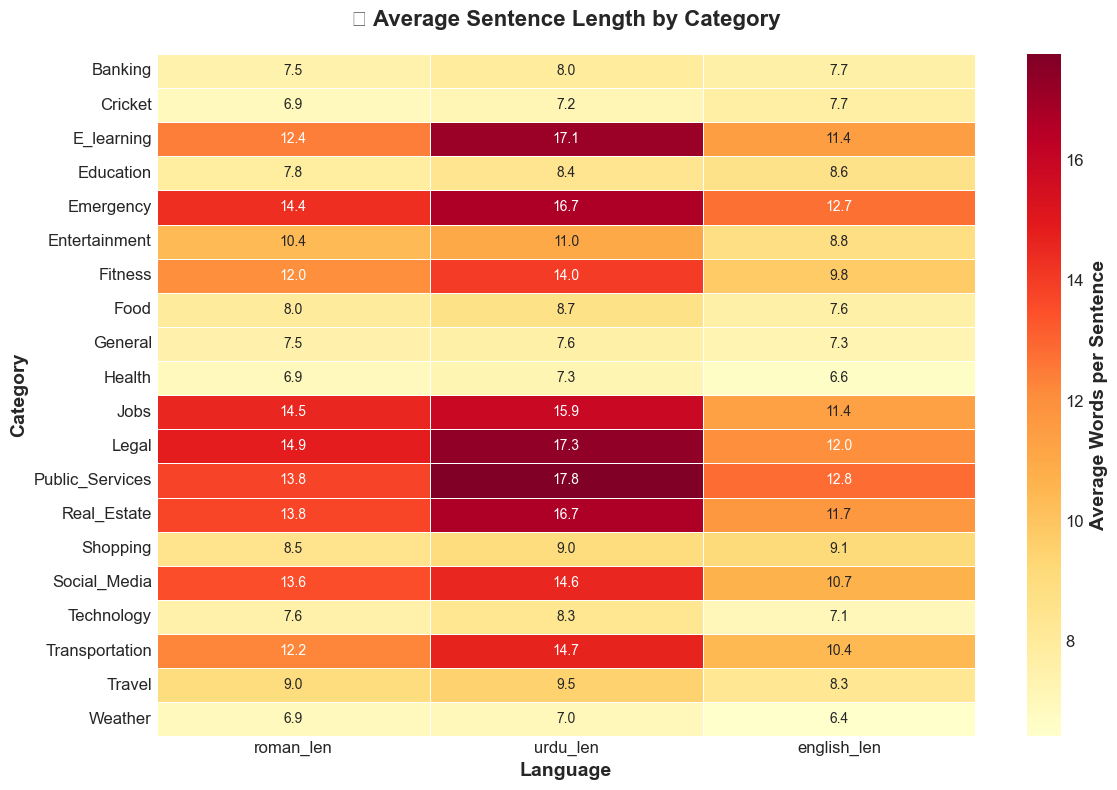

In [18]:
# ==============================================================
# 📊 Category-wise Length Heatmap
# ==============================================================

# Prepare data for heatmap
heatmap_data = df.groupby('category')[['roman_len', 'urdu_len', 'english_len']].mean()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlOrRd', 
            linewidths=0.5, cbar_kws={'label': 'Average Words per Sentence'})
plt.title('📊 Average Sentence Length by Category', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Language', fontsize=14)
plt.ylabel('Category', fontsize=14)
plt.tight_layout()
plt.show()


# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">💡 Key Insights & Conclusi </p>**

In [19]:
# ==============================================================
# 💡 Generate Key Insights
# ==============================================================

# Calculate various metrics for insights
total_sentences = len(df)
avg_roman_len = df['roman_len'].mean()
avg_urdu_len = df['urdu_len'].mean()
avg_english_len = df['english_len'].mean()
most_common_category = df['category'].mode()[0]
most_frequent_roman_word = Counter(' '.join(df['roman_urdu'].astype(str)).split()).most_common(1)[0][0]
most_frequent_english_word = Counter(' '.join(df['translated_by_llm'].astype(str)).split()).most_common(1)[0][0]
translation_match_rate = (df['translated_by_llm'] == df['translated_by_google']).mean() * 100

# Create insights HTML
insights_html = f"""
<div style="background-color: #f0f8ff; padding: 25px; border-radius: 15px; border-left: 8px solid #4CAF50; margin: 20px 0;">
    <h3 style="color: #2c3e50; margin-top: 0;">🔍 Key Dataset Insights</h3>
    
    <table style="width:100%; border-collapse: collapse;">
        <tr>
            <td style="padding: 10px; width: 50%;">
                <div style="background-color: white; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                    <span style="font-size: 24px;">📊</span>
                    <h4 style="margin: 5px 0; color: #2c3e50;">Dataset Size</h4>
                    <p style="font-size: 20px; font-weight: bold; color: #4CAF50;">{total_sentences:,}</p>
                    <p style="color: #7f8c8d;">sentences across {df['category'].nunique()} categories</p>
                </div>
            </td>
            <td style="padding: 10px;">
                <div style="background-color: white; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                    <span style="font-size: 24px;">📏</span>
                    <h4 style="margin: 5px 0; color: #2c3e50;">Average Sentence Length</h4>
                    <p style="font-size: 18px;">RU: <b>{avg_roman_len:.1f}</b> | UR: <b>{avg_urdu_len:.1f}</b> | EN: <b>{avg_english_len:.1f}</b></p>
                </div>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px;">
                <div style="background-color: white; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                    <span style="font-size: 24px;">🏷️</span>
                    <h4 style="margin: 5px 0; color: #2c3e50;">Most Common Category</h4>
                    <p style="font-size: 20px; font-weight: bold; color: #E67E22;">{most_common_category}</p>
                </div>
            </td>
            <td style="padding: 10px;">
                <div style="background-color: white; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                    <span style="font-size: 24px;">🔤</span>
                    <h4 style="margin: 5px 0; color: #2c3e50;">Most Frequent Words</h4>
                    <p>Roman Urdu: <b>'{most_frequent_roman_word}'</b></p>
                    <p>English: <b>'{most_frequent_english_word}'</b></p>
                </div>
            </td>
        </tr>
        <tr>
            <td style="padding: 10px;" colspan="2">
                <div style="background-color: white; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px rgba(0,0,0,0.1);">
                    <span style="font-size: 24px;">🔄</span>
                    <h4 style="margin: 5px 0; color: #2c3e50;">Translation Consistency</h4>
                    <p style="font-size: 20px; font-weight: bold; color: #3498DB;">{translation_match_rate:.1f}%</p>
                    <p>of translations match between LLM and Google Translate</p>
                </div>
            </td>
        </tr>
    </table>
</div>
"""

display(HTML(insights_html))


# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">🚀 Practical Applications</p>**

In [20]:
# ==============================================================
# 🚀 Dataset Application Suggestions
# ==============================================================

applications_html = """
<div style="background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); padding: 30px; border-radius: 20px; color: white; margin: 30px 0;">
    <h2 style="color: white; text-align: center; margin-bottom: 30px;">🌟 Dataset Applications & Use Cases</h2>
    
    <div style="display: flex; flex-wrap: wrap; justify-content: space-around;">
        
        <div style="background: rgba(255,255,255,0.1); padding: 20px; border-radius: 15px; width: 30%; margin: 10px; backdrop-filter: blur(5px);">
            <h3 style="color: #FFD700;">🤖 Machine Translation</h3>
            <ul style="list-style-type: none; padding: 0;">
                <li style="margin: 10px 0;">✓ Train Roman Urdu → English models</li>
                <li style="margin: 10px 0;">✓ Benchmark translation systems</li>
                <li style="margin: 10px 0;">✓ Compare LLM vs Google Translate</li>
            </ul>
        </div>
        
        <div style="background: rgba(255,255,255,0.1); padding: 20px; border-radius: 15px; width: 30%; margin: 10px; backdrop-filter: blur(5px);">
            <h3 style="color: #FFD700;">📝 NLP Research</h3>
            <ul style="list-style-type: none; padding: 0;">
                <li style="margin: 10px 0;">✓ Cross-lingual embeddings</li>
                <li style="margin: 10px 0;">✓ Language model fine-tuning</li>
                <li style="margin: 10px 0;">✓ Syntactic analysis across languages</li>
            </ul>
        </div>
        
        <div style="background: rgba(255,255,255,0.1); padding: 20px; border-radius: 15px; width: 30%; margin: 10px; backdrop-filter: blur(5px);">
            <h3 style="color: #FFD700;">💬 Chatbot Development</h3>
            <ul style="list-style-type: none; padding: 0;">
                <li style="margin: 10px 0;">✓ Roman Urdu conversational AI</li>
                <li style="margin: 10px 0;">✓ Multilingual customer support</li>
                <li style="margin: 10px 0;">✓ Cross-lingual intent recognition</li>
            </ul>
        </div>
        
        <div style="background: rgba(255,255,255,0.1); padding: 20px; border-radius: 15px; width: 30%; margin: 10px; backdrop-filter: blur(5px);">
            <h3 style="color: #FFD700;">🔤 Spell Checking</h3>
            <ul style="list-style-type: none; padding: 0;">
                <li style="margin: 10px 0;">✓ Roman Urdu spell checkers</li>
                <li style="margin: 10px 0;">✓ Transliteration systems</li>
                <li style="margin: 10px 0;">✓ Text normalization tools</li>
            </ul>
        </div>
        
        <div style="background: rgba(255,255,255,0.1); padding: 20px; border-radius: 15px; width: 30%; margin: 10px; backdrop-filter: blur(5px);">
            <h3 style="color: #FFD700;">📚 Educational Tools</h3>
            <ul style="list-style-type: none; padding: 0;">
                <li style="margin: 10px 0;">✓ Language learning apps</li>
                <li style="margin: 10px 0;">✓ Urdu-English parallel corpora</li>
                <li style="margin: 10px 0;">✓ Teaching materials development</li>
            </ul>
        </div>
        
        <div style="background: rgba(255,255,255,0.1); padding: 20px; border-radius: 15px; width: 30%; margin: 10px; backdrop-filter: blur(5px);">
            <h3 style="color: #FFD700;">🔬 Academic Research</h3>
            <ul style="list-style-type: none; padding: 0;">
                <li style="margin: 10px 0;">✓ Low-resource language studies</li>
                <li style="margin: 10px 0;">✓ Comparative linguistics</li>
                <li style="margin: 10px 0;">✓ Machine translation evaluation</li>
            </ul>
        </div>
    </div>
</div>
"""

display(HTML(applications_html))


# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">📊 Dataset Summary & Metadata</p>**

In [22]:
# ==============================================================
# 📊 Dataset Summary Report
# ==============================================================

# Create comprehensive summary
summary_data = {
    'Metric': [
        'Dataset Name',
        'Total Records',
        'Total Features',
        'Categories Count',
        'Roman Urdu Vocabulary Size',
        'Urdu Script Vocabulary Size',
        'English Vocabulary Size',
        'Average Roman Urdu Length',
        'Average Urdu Script Length',
        'Average English Length',
        'Shortest Sentence (words)',
        'Longest Sentence (words)',
        'Translation Match Rate',
        'Missing Values'
    ],
    'Value': [
        'Roman Urdu Parallel Translation Dataset',
        f'{len(df):,}',
        f'{len(df.columns)}',
        f'{df["category"].nunique()}',
        f'{len(set(" ".join(df["roman_urdu"].astype(str)).split())):,}',
        f'{len(set(" ".join(df["urdu_script"].astype(str)).split())):,}',
        f'{len(set(" ".join(df["translated_by_llm"].astype(str)).split())):,}',
        f'{df["roman_len"].mean():.2f} words',
        f'{df["urdu_len"].mean():.2f} words',
        f'{df["english_len"].mean():.2f} words',
        f'{min(df["roman_len"].min(), df["urdu_len"].min(), df["english_len"].min())}',
        f'{max(df["roman_len"].max(), df["urdu_len"].max(), df["english_len"].max())}',
        f'{(df["translated_by_llm"] == df["translated_by_google"]).mean() * 100:.1f}%',
        f'{df.isnull().sum().sum()}'
    ]
}

summary_df = pd.DataFrame(summary_data)

# Style the summary table
styled_summary = summary_df.style.set_properties(**{
    'text-align': 'left',
    'padding': '12px',
    'border': '1px solid #ddd'
}).set_table_styles([{
    'selector': 'th',
    'props': [('background-color', '#4CAF50'), ('color', 'white'), ('padding', '12px'), ('font-size', '14px')]
}, {
    'selector': 'td',
    'props': [('padding', '10px'), ('border-bottom', '1px solid #ddd')]
}]).hide(axis='index')

display(HTML("<h3>📋 Dataset Summary Report</h3>"))
display(styled_summary)

Metric,Value
Dataset Name,Roman Urdu Parallel Translation Dataset
Total Records,"4,000"
Total Features,11
Categories Count,20
Roman Urdu Vocabulary Size,"3,892"
Urdu Script Vocabulary Size,"3,685"
English Vocabulary Size,"4,098"
Average Roman Urdu Length,10.43 words
Average Urdu Script Length,11.83 words
Average English Length,9.41 words




# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">👏 Acknowledgements & References </p>**

In [23]:
# ==============================================================
# 👏 Acknowledgements & References
# ==============================================================

acknowledgements_html = """
<div style="background-color: #f9f9f9; padding: 30px; border-radius: 20px; border: 1px solid #e0e0e0; margin: 30px 0;">
    <h2 style="color: #2c3e50; text-align: center; margin-bottom: 30px;">🙏 Acknowledgements & References</h2>
    
    <div style="display: flex; flex-wrap: wrap; justify-content: space-around;">
        
        <div style="width: 45%; min-width: 300px; margin: 15px;">
            <h3 style="color: #3498db;">📚 References</h3>
            <ul style="line-height: 1.8;">
                <li><b>Dataset:</b> Roman Urdu Sentences with Urdu and English Translations</li>
                <li><b>Source:</b> Kaggle Datasets</li>
                <li><b>Author:</b> Abdul Wali</li>
                <li><b>License:</b> CC0: Public Domain</li>
            </ul>
        </div>
        
        <div style="width: 45%; min-width: 300px; margin: 15px;">
            <h3 style="color: #e74c3c;">🔧 Tools & Libraries</h3>
            <ul style="line-height: 1.8;">
                <li>🐼 pandas - Data manipulation</li>
                <li>📊 matplotlib & seaborn - Visualization</li>
                <li>☁️ wordcloud - Word cloud generation</li>
                <li>🔢 numpy - Numerical operations</li>
            </ul>
        </div>
        
        <div style="width: 45%; min-width: 300px; margin: 15px;">
            <h3 style="color: #2ecc71;">🎯 Analysis Highlights</h3>
            <ul style="line-height: 1.8;">
                <li>✅ Complete EDA with 4,000 sentences</li>
                <li>✅ Multi-language comparative analysis</li>
                <li>✅ Translation quality assessment</li>
                <li>✅ Vocabulary and pattern analysis</li>
            </ul>
        </div>
        
        <div style="width: 45%; min-width: 300px; margin: 15px;">
            <h3 style="color: #f39c12;">📌 Citation</h3>
            <div style="background-color: #2c3e50; color: #ecf0f1; padding: 15px; border-radius: 8px; font-family: monospace;">
                @misc{roman_urdu_dataset,<br>
                &nbsp;&nbsp;title = {Roman Urdu Sentences with Urdu and English Translations},<br>
                &nbsp;&nbsp;author = {Abdul Wali},<br>
                &nbsp;&nbsp;year = {2025},<br>
                &nbsp;&nbsp;publisher = {Kaggle}<br>
                }
            </div>
        </div>
    </div>
</div>
"""

display(HTML(acknowledgements_html))


# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">✅ Conclusion </p>**

In [24]:
# ==============================================================
# ✅ Final Message
# ==============================================================

conclusion_html = """
<div style="background: linear-gradient(to right, #667eea, #764ba2); padding: 40px; border-radius: 30px; text-align: center; color: white; margin: 30px 0;">
    <h1 style="font-size: 48px; margin-bottom: 20px;">✅ Analysis Complete</h1>
    <p style="font-size: 20px; margin-bottom: 30px;">Thank you for exploring this comprehensive analysis of the Roman Urdu Parallel Translation Dataset!</p>
    
    <div style="display: flex; justify-content: center; gap: 30px; margin-top: 30px;">
        <div style="background: rgba(255,255,255,0.2); padding: 20px; border-radius: 15px; width: 200px;">
            <span style="font-size: 40px;">📊</span>
            <h3>4,000</h3>
            <p>Sentences Analyzed</p>
        </div>
        <div style="background: rgba(255,255,255,0.2); padding: 20px; border-radius: 15px; width: 200px;">
            <span style="font-size: 40px;">🔤</span>
            <h3>3</h3>
            <p>Languages</p>
        </div>
        <div style="background: rgba(255,255,255,0.2); padding: 20px; border-radius: 15px; width: 200px;">
            <span style="font-size: 40px;">📈</span>
            <h3>20+</h3>
            <p>Visualizations</p>
        </div>
    </div>
    
    <p style="margin-top: 40px; font-size: 18px;">✨ Happy Analyzing! May your models be accurate and your insights profound! ✨</p>
</div>
"""

display(HTML(conclusion_html))


# **<p style="font-family:newtimeroman;font-size:160%;text-align:center;color: #85f5b0;">ThankYou for your time </p>**